# Intensity Transformer

https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/

https://www.geeksforgeeks.org/negative-transformation-of-an-image-using-python-and-opencv/

Applied to image contrast manipulation and image threshold.

Perform directly on pixels.

**Commly used Intensity Transformer:**
1. Image Negatives (Linear)
2. Log Transformations
3. Power-Law (Gamma) Transformations
4. Piecewise-Linear Transformation Functions


### 1. Image Negatives (Linear)

When we try to negatively transform an image, the brightest areas are transformed into the darkest and the darkest areas are transformed into the brightest.

As we know, a color image stores 3 different channels. They are red, green and blue. That’s why color images are also known as RGB images. So, if we need a negative transformation of an image then we need to invert these 3 channels.

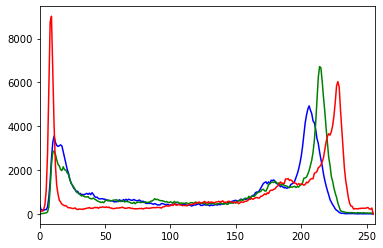

In [3]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

image = cv2.imread(r"C:\Users\pcc\Desktop\DSC_3073.JPG")
image= cv2.resize(image, (500,500))

color= ("b","g","r")
for i, col in enumerate(color):
    histr=cv2.calcHist([image],[i],None,[256],[0,255])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

plt.show()

# Negative Transformation of image 
**First method: Steps for negative transformation**

1. Read an image
2. Get height and width of the image
3. Each pixel contains 3 channels. So, take a pixel value and collect 3 channels in 3 different variables.
4. Negate 3 pixels values from 255 and store them again in pixel used before.
5. Do it for all pixel values present in image.

**2nd method: Steps for negative transformation**

1. Read an image and store it in a variable.
2. Subtract the variable from 1 and store the value in another variable.
3. All done. You successfully done the negative transformation.


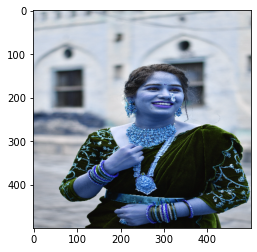

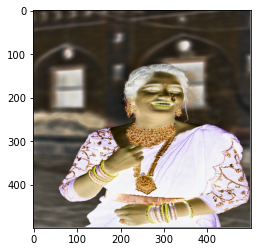

In [8]:
image1=image.copy()
plt.imshow(image)
plt.show()

h,w,d= image.shape

for i in range(0,h-1):
    for j in range(0,w-1):
        pixel=image1[i,j]
        
        pixel[0]=255-pixel[0]
        pixel[1]=255-pixel[1]
        pixel[2]=255-pixel[2]
        
        image1[i,j]=pixel
        
plt.imshow(image1)
plt.show()
        
        


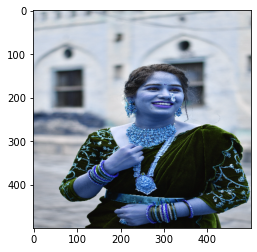

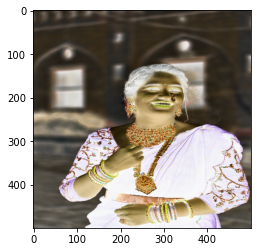

In [13]:
plt.imshow(image)
plt.show()

img_neg=1-image
plt.imshow(img_neg)
plt.show()

# 2. Log Transformation

Mathematically, log transformations can be expressed as s = clog(1+r). Here, s is the output intensity, r>=0 is the input intensity of the pixel, and c is a scaling constant. c is given by 255/(log (1 + m)), where m is the maximum pixel value in the image. It is done to ensure that the final pixel value does not exceed (L-1), or 255. Practically, log transformation maps a narrow range of low-intensity input values to a wide range of output values.

C:\Users\pcc\AppData\Local\Temp/ipykernel_11260/2744527645.py:3: RuntimeWarning: divide by zero encountered in log
  s=c*np.log(1+image)


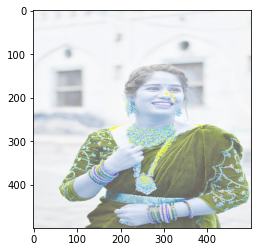

In [17]:
m=np.max(image)
c=255/(np.log(1+m))
s=c*np.log(1+image)

log_transformed= np.array(s, dtype=np.uint8)

plt.imshow(log_transformed)
plt.show()

# Power-Law (Gamma) Transformation:
Power-law (gamma) transformations can be mathematically expressed as s= cr^{\gamma}. Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. This is done because our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion. Below is the Python code to apply gamma correction.

gamma =0.4


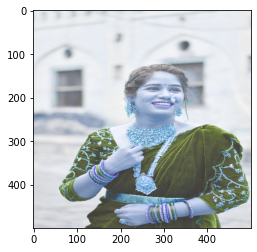

gamma =0.8


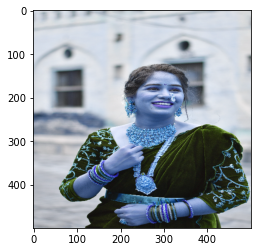

gamma =1.4


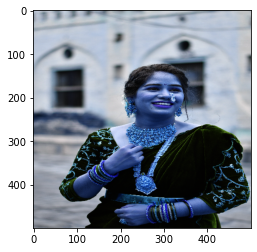

gamma =1.8


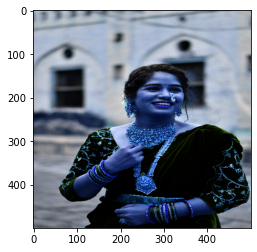

gamma =2.2


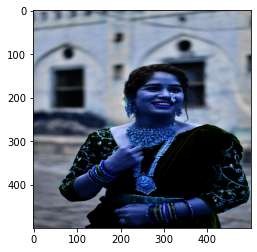

In [19]:
gamma=[0.4,0.8,1.4,1.8,2.2]

for i in gamma:
    image_gamma_trans=np.array(255 * (image/255) ** i,dtype="uint8")
    print("gamma ="+str(i))
    plt.imshow(image_gamma_trans)
    plt.show()

As can be observed from the outputs as well as the graph, gamma>1 (indicated by the curve corresponding to ‘nth power’ label on the graph), the intensity of pixels decreases i.e. the image becomes darker. On the other hand, gamma<1 (indicated by the curve corresponding to 'nth root' label on the graph), the intensity increases i.e. the image becomes lighter.

# 4. Piecewise-Linear Transformation Functions 

These functions, as the name suggests, are not entirely linear in nature. However, they are linear between certain x-intervals. One of the most commonly used piecewise-linear transformation functions is contrast stretching.

Contrast can be defined as:

Contrast =  (I_max - I_min)/(I_max + I_min)

With (r1, s1), (r2, s2) as parameters, the function stretches the intensity levels by essentially decreasing the intensity of the dark pixels and increasing the intensity of the light pixels. If r1 = s1 = 0 and r2 = s2 = L-1, the function becomes a straight dotted line in the graph (which gives no effect). The function is monotonically increasing so that the order of intensity levels between pixels is preserved.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


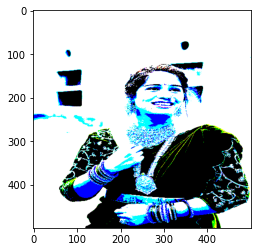

In [31]:
def pixel_val(pix,r1,s1,r2,s2):
    if (0<=pix and pix<=r1):
        return (s1/r1)*pix
    if (r1 <= pix and pix <=r2):
        return ((s2-s1)/(r2-r1))*(pix - r1)+s1
    else:
        return ((255-s2)/(255-r2))*(pix-r2)+s2
    
r1,s1,r2,s2=70,0,50,70

pixel_vec=np.vectorize(pixel_val)

contrast_img=pixel_vec(image,r1,s1,r2,s2)

plt.imshow(contrast_img)
plt.show()